In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
def visualize_data(x,y, title='Random Plot', target=[0], label =['Principal component 1', 'Principal component 2']):
    colormap = np.array(['r', 'g', 'b'])
    plt.scatter(x,y, c= colormap[target])
    plt.title(title)
    plt.xlabel(label[0])
    plt.ylabel(label[1])
#     plt.axhline(0, color='b')
    # Add a legend with roll numbers
    plt.legend([f'Roll [5,9]'])
    plt.show()

def cal_cov_eig(new_x):
    cov_mat = np.cov(new_x.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    print(f'Covariance Matrix: {cov_mat}\n Eigen Values: {eigenvalues}\n Eigen Vectors: {eigenvectors}')
    return cov_mat,  eigenvalues, eigenvectors

def apply_pca(eigen_row, x):
    pca_data = np.matmul(eigen_row, x.T)
    pca_data= pca_data.T
    return pca_data

def cal_prop(e):
    prop = []
    sum = np.sum(e)
    for i in range(len(e)):
        prop.append((e[i]/sum)*100)
    return prop

#return rowise eigen vector
def sort_evect(eval, evect):
    pair = dict()
    for i in range(len(eval)):
        pair[np.abs(eval[i])]= evect[:, i]  
    sorted_pair = dict(sorted(pair.items(), reverse= True))
    evect_sorted= np.array(list(sorted_pair.values()))
    return evect_sorted

In [5]:
#loading the dataset
from sklearn.datasets import load_iris
ds = load_iris()
df = pd.DataFrame(data=ds.data, columns=ds.feature_names)

In [6]:
df['target'] = pd.Series(ds.target)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df['target'].unique()

array([0, 1, 2])

In [8]:
x = df.iloc[:, 0:4].values

In [9]:
print(np.mean(x))
np.std(x)

3.4644999999999997


1.9738430577598278

In [12]:
x_std = StandardScaler().fit_transform(x) 
x_std.mean(), x_std.std()

(-1.4684549872375404e-15, 1.0)

In [13]:
cov_mat,  eigenvalues, eigenvectors = cal_cov_eig(x_std)

Covariance Matrix: [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
 Eigen Values: [2.93808505 0.9201649  0.14774182 0.02085386]
 Eigen Vectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [32]:
p = cal_prop(eigenvalues)
p

[72.96244541329983, 22.850761786701817, 3.668921889282866, 0.5178709107154746]

In [47]:
#no. of principal comp
k = 2
evect_sorted = sort_evect(eigenvalues, eigenvectors)
output = apply_pca(evect_sorted[:k,:], x_std)
np.cov(output.T)

array([[2.93808505e+00, 6.67624047e-16],
       [6.67624047e-16, 9.20164904e-01]])

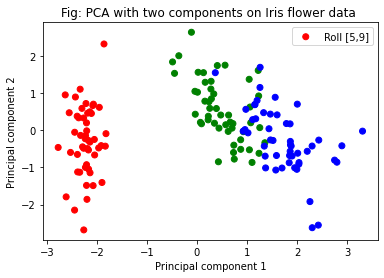

In [57]:
 visualize_data(output[:,0], output[:,1], 'Fig: PCA with two components on Iris flower data ', df.iloc[:,4])

In [20]:
#latek
#built in pca feature vs. 

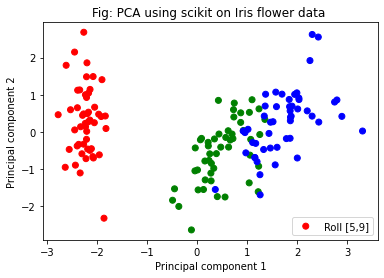

In [58]:
from sklearn.decomposition import PCA

# Assume you have a dataset called `data` with dimensions (m, n)

# Create an instance of PCA with the desired number of components
n_components = 2  # Specify the number of principal components you want to retain
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(x_std)

# Transform the data to the lower-dimensional space
transformed_data = pca.transform(x_std)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Access the principal components
principal_components = pca.components_

visualize_data(transformed_data[:,0], transformed_data[:,1], 'Fig: PCA using scikit on Iris flower data ', df.iloc[:,4])


In [ ]:
#PCA using 3 and 4 th larger eigen value
#no. of principal comp
k = 2
evect_sorted = sort_evect(eigenvalues, eigenvectors)
output = apply_pca(evect_sorted[:k,:], x_std)
visualize_data(output[:,0], output[:,1], 'Fig: PCA with two components on Iris flower data using 2nd and 3rd PC ', df.iloc[:,4])